In [1]:
import polars as pl
import os
import numpy as np
import torch, torchvision
from torchvision.utils import make_grid
from glio.loaders import nifti
from glio.python_tools import get_all_files
from glio.jupyter_tools import clean_mem
from glio.visualize import Visualizer
import matplotlib.pyplot as plt

Рассматриваем изображения *`E:\dataset\PKG - UPENN-GBM-NIfTI\UPENN-GBM\NIfTI-files\images_DTI\images_DTI\UPENN-GBM-*\UPENN-GBM-*_DTI_AD.nii.gz`*

Размер - **[240, 240, 155]**

Можно удалить пустые разрезы по каждому измерению - **[44:191, 36:222, 2:141]**

Тогда получаем изображения размера **[147, 186, 139]**, суммарно 3,800,538 значений.

Все изображения можно загрузить в память - занимается 28/40 ГБ.

Изображения имеют следующие характеристики: *min = 0; max ~= 0.003-0.005; mean ~= 0.0003-0.0007; std ~= 0.0006-0.0008*.

Значения для нормализации:
```python
mean = [0.0002149488]
std = [0.0005426282]
```

torch.Size([147, 186, 139])


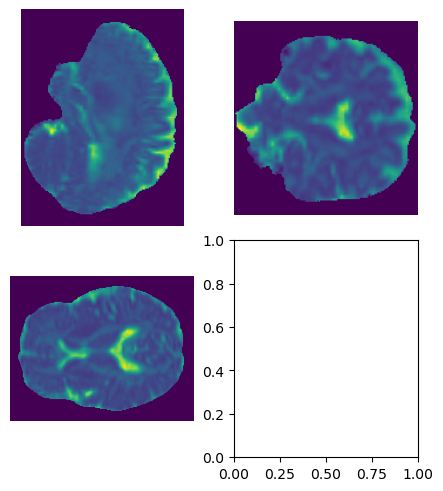

In [2]:
path = r"E:\dataset\PKG - UPENN-GBM-NIfTI\UPENN-GBM\NIfTI-files\images_DTI\images_DTI"
sample_image_path = f"{path}/UPENN-GBM-00001_11/UPENN-GBM-00001_11_DTI_AD.nii.gz"
sample_image = nifti.read(sample_image_path)[44:191, 36:222, 2:141]
print(sample_image.shape)
v = Visualizer()
v.imshow(sample_image[100], 'hw')
v.imshow(sample_image[:, 100], 'hw')
v.imshow(sample_image[:, :, 70], 'hw')
v.show()

In [5]:
from glio.data.DS import DSRegression
from torchvision.transforms import v2
mean, std = torch.tensor([0.0002149488]), torch.tensor([0.0005426282])
normalize = v2.Normalize(mean, std)

def loader(study_row:str):
    study_id = study_row[0]
    path = rf"E:\dataset\PKG - UPENN-GBM-NIfTI\UPENN-GBM\NIfTI-files\images_DTI\images_DTI\{study_id}\{study_id}_DTI_AD.nii.gz"
    return normalize(nifti.read(path).unsqueeze(0))


def get_dataset(path = r"E:\dataset\PKG - UPENN-GBM-NIfTI\UPENN-GBM"):
    df = pl.read_csv(f"{path}/UPENN-GBM_clinical_info_v2.1.csv", null_values = ["Not Available", "NA"]).drop_nulls("PsP_TP_score")
    ds = DSRegression()
    ds.add_samples(df.rows(), target=lambda x: x[-1], loader=loader)
    return ds

In [6]:
ds = get_dataset()
ds.normalize_targets()
print(ds[0])

(tensor([[[[-0.3961, -0.3961, -0.3961,  ..., -0.3961, -0.3961, -0.3961],
          [-0.3961, -0.3961, -0.3961,  ..., -0.3961, -0.3961, -0.3961],
          [-0.3961, -0.3961, -0.3961,  ..., -0.3961, -0.3961, -0.3961],
          ...,
          [-0.3961, -0.3961, -0.3961,  ..., -0.3961, -0.3961, -0.3961],
          [-0.3961, -0.3961, -0.3961,  ..., -0.3961, -0.3961, -0.3961],
          [-0.3961, -0.3961, -0.3961,  ..., -0.3961, -0.3961, -0.3961]],

         [[-0.3961, -0.3961, -0.3961,  ..., -0.3961, -0.3961, -0.3961],
          [-0.3961, -0.3961, -0.3961,  ..., -0.3961, -0.3961, -0.3961],
          [-0.3961, -0.3961, -0.3961,  ..., -0.3961, -0.3961, -0.3961],
          ...,
          [-0.3961, -0.3961, -0.3961,  ..., -0.3961, -0.3961, -0.3961],
          [-0.3961, -0.3961, -0.3961,  ..., -0.3961, -0.3961, -0.3961],
          [-0.3961, -0.3961, -0.3961,  ..., -0.3961, -0.3961, -0.3961]],

         [[-0.3961, -0.3961, -0.3961,  ..., -0.3961, -0.3961, -0.3961],
          [-0.3961, -0.3961, 

-9.251858538542972e-17